# Sign Language Classification

Pictures with ASL (American Sign Language) sign language symbols are given. It is necessary to build a machine learning model that could correctly recognize sign language symbols and classify them into certain groups.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)

100%|██████████| 62.6M/62.6M [00:00<00:00, 74.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1


In [4]:
path = "/root/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1"

In [9]:
!ls "{path}"

american_sign_language.PNG  amer_sign3.png   sign_mnist_test.csv  sign_mnist_train.csv
amer_sign2.png		    sign_mnist_test  sign_mnist_train


In [11]:
train_df = pd.read_csv(f"{path}/sign_mnist_train.csv")
test_df = pd.read_csv(f"{path}/sign_mnist_test.csv")


In [12]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [13]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [14]:
x_train = train_df.values
x_test = test_df.values
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

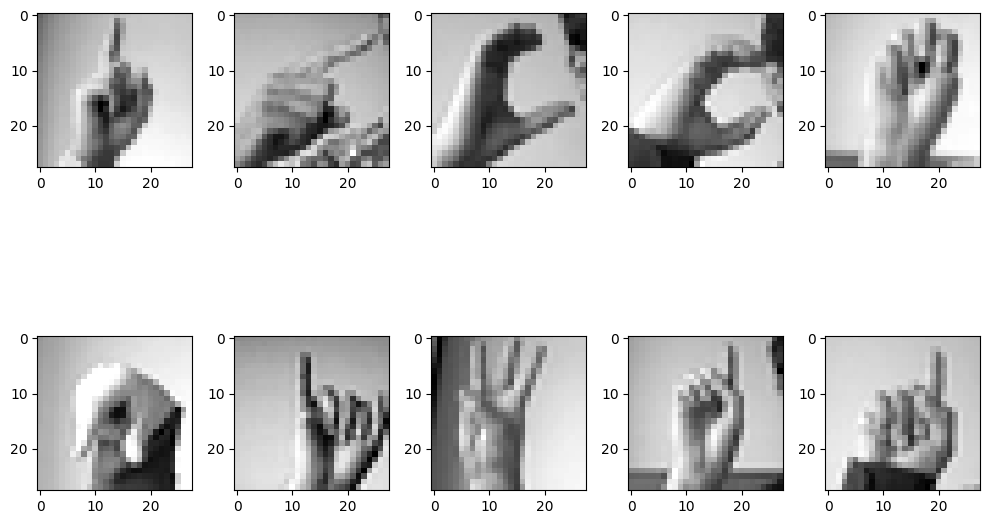

In [15]:
f, ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

# Building a Convolutional Neural Network

### 1. Construction of the simplest CNN architecture

In [16]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,703,832 (98.05 MB)

 Trainable params: 25,703,704 (98.05 MB)

 Non-trainable params: 128 (512.00 B)

In [19]:
# To gradually reduce the learning rate
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy', # how the model's performance is evaluated
    patience=2, # number of epochs without improvement
    verbose=1, # verbosity level (output messages)
    factor=0.5, # reduction factor for the learning rate
    min_lr=0.00001 # lower limit for the learning rate
)


In [22]:
fitted_values1 = model.fit(x_train, y_train,
                          batch_size=128,
                          epochs = 15,
                          validation_data = (x_test, y_test),
                          callbacks = [learning_rate_reduction])

Epoch 1/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 1.0000 - loss: 3.5655e-05 - val_accuracy: 0.7836 - val_loss: 1.2539 - learning_rate: 0.0010
Epoch 2/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 1.0000 - loss: 2.3737e-05 - val_accuracy: 0.7860 - val_loss: 1.2878 - learning_rate: 0.0010
Epoch 3/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 1.0000 - loss: 1.5312e-05 - val_accuracy: 0.7863 - val_loss: 1.2973 - learning_rate: 0.0010
Epoch 4/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 1.0000 - loss: 1.0895e-05 - val_accuracy: 0.7895 - val_loss: 1.3159 - learning_rate: 0.0010
Epoch 5/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 1.0000 - loss: 8.3182e-06 - val_accuracy: 0.7914 - val_loss: 1.3252 - learning_rate: 0.0010
Epoch 6/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 1.0000 - loss: 6.1709e-06 - val_accuracy: 0.7885 - val_loss: 1.3536 - learning_rate: 0.0010
Epoch 7/15
211/215 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc

In [23]:
print("Accuracy of the model is - " , model.evaluate(x_test, y_test)[1]*100 , "%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7883 - loss: 1.4552
Accuracy of the model is -  79.19687628746033 %


### 2. Complicating the CNN architecture

In [24]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [25]:
fitted_values2 = model.fit(x_train, y_train,
                          batch_size=128,
                          epochs = 5,
                          validation_data = (x_test, y_test),
                          callbacks = [learning_rate_reduction])

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.6343 - loss: 1.2752 - val_accuracy: 0.1323 - val_loss: 3.1093 - learning_rate: 0.0010
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9936 - loss: 0.0300 - val_accuracy: 0.7359 - val_loss: 0.8228 - learning_rate: 0.0010
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9986 - loss: 0.0080 - val_accuracy: 0.9497 - val_loss: 0.1675 - learning_rate: 0.0010
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9994 - loss: 0.0038 - val_accuracy: 0.9607 - val_loss: 0.1147 - learning_rate: 0.0010
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 0.9525 - val_loss: 0.1720 - learning_rate: 0.0010


In [26]:
print("Accuracy of the model is - " , model.evaluate(x_test, y_test)[1]*100 , "%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9495 - loss: 0.1802
Accuracy of the model is -  95.24539709091187 %


### 3. Sophisticated CNN + Data Augmentation architecture

In [27]:
image_generator = ImageDataGenerator(
    featurewise_center=False,  # настроить нормировку
    samplewise_center=False,  # настроить нормировку
    featurewise_std_normalization=False,  # настроить стандартизацию
    samplewise_std_normalization=False,  # настроить стандартизацию
    zca_whitening=False,  # применить высветление
    rotation_range=10,  # задать угол случайного поворота изображения
    zoom_range = 0.1, # задать zoom
    width_shift_range=0.1,  # задать сдвиг как долю от всей ширины изображения
    height_shift_range=0.1,  # задать сдвиг как долю от всей высоты изображения
    horizontal_flip=False,  # задать случайное зеркальное отображение
    vertical_flip=False)  # задать случайное зеркальное отображение


image_generator.fit(x_train)

In [29]:
fitted_values3 = model.fit(image_generator.flow(x_train,y_train, batch_size = 128) ,
                    epochs = 15,
                    validation_data = (x_test, y_test) ,
                    callbacks = [learning_rate_reduction])

Epoch 1/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.9703 - loss: 0.0886 - val_accuracy: 0.9664 - val_loss: 0.0805 - learning_rate: 0.0010
Epoch 2/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.9805 - loss: 0.0556 - val_accuracy: 0.9827 - val_loss: 0.0556 - learning_rate: 0.0010
Epoch 3/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9873 - loss: 0.0382 - val_accuracy: 0.9976 - val_loss: 0.0098 - learning_rate: 0.0010
Epoch 4/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9921 - loss: 0.0244 - val_accuracy: 0.9717 - val_loss: 0.0627 - learning_rate: 0.0010
Epoch 5/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9906 - loss: 0.0277
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - accuracy: 0.9906 - loss: 0.0277 - val_accuracy: 0.9650 - val_loss: 0.0963 - learning_rate: 0.0010
Epoch 6/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.9960 - los

In [30]:
print("Accuracy of the model with data augmentation is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.2576e-04
Accuracy of the model with data augmentation is -  100.0 %


### 4. Final validation of the CNN model

In [31]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [32]:
fitted_values4 = model.fit(image_generator.flow(x_train,y_train, batch_size = 128),
                           epochs = 20,
                           validation_data = (x_test, y_test) ,
                           callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.5541 - loss: 1.5117 - val_accuracy: 0.1892 - val_loss: 2.9820 - learning_rate: 0.0010
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.9513 - loss: 0.1549 - val_accuracy: 0.5047 - val_loss: 1.4751 - learning_rate: 0.0010
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9778 - loss: 0.0688 - val_accuracy: 0.9668 - val_loss: 0.1004 - learning_rate: 0.0010
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9814 - loss: 0.0571 - val_accuracy: 0.9941 - val_loss: 0.0245 - learning_rate: 0.0010
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9889 - loss: 0.0352 - val_accuracy: 0.9618 - val_loss: 0.1009 - learning_rate: 0.0010
Epoch 6/20
210/215 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9914 - loss: 0.0262
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9915 - los

In [33]:
print("Accuracy of the model with data augmentation is  - " , model.evaluate(x_test, y_test)[1]*100 , "%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9970 - loss: 0.0063
Accuracy of the model with data augmentation is  -  99.72113966941833 %


### Analysis of the results obtained

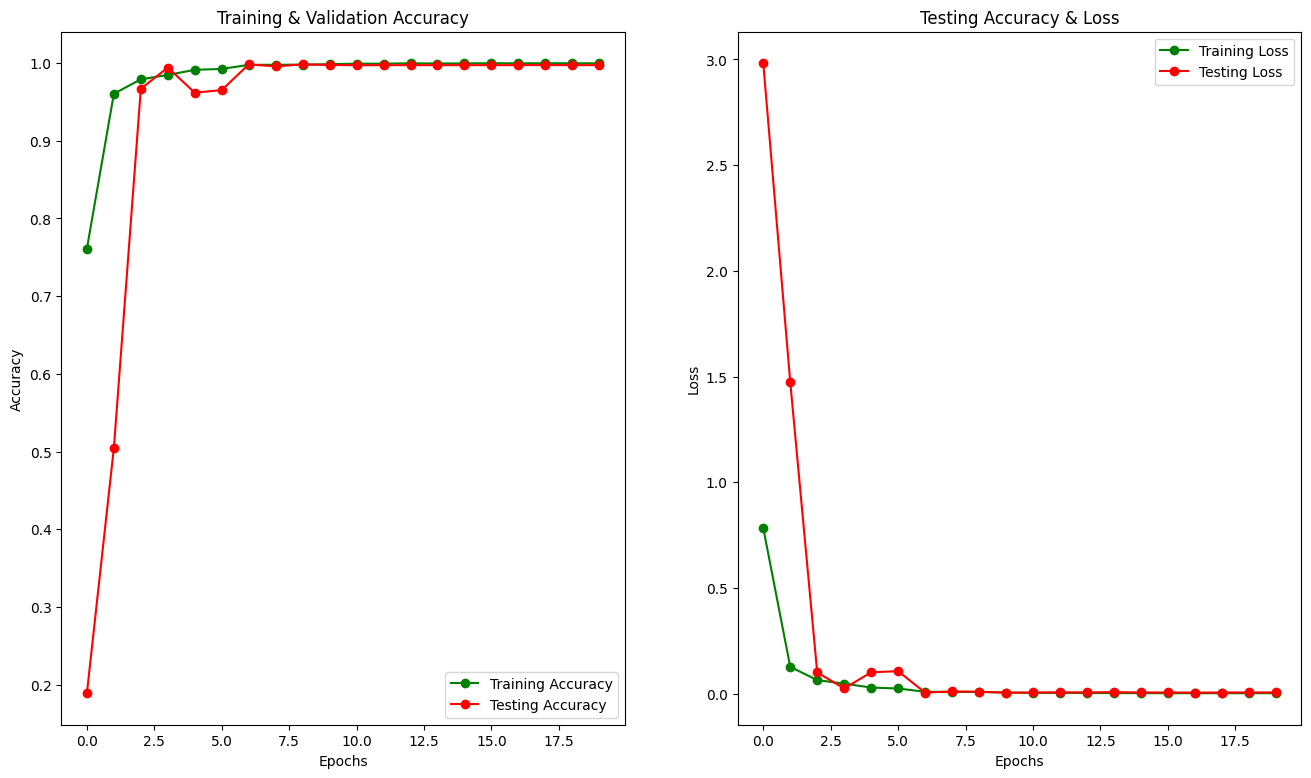

In [34]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = fitted_values4.history['accuracy']
train_loss = fitted_values4.history['loss']
val_acc = fitted_values4.history['val_accuracy']
val_loss = fitted_values4.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [35]:
predictions = model.predict(x_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [37]:
model.save("sign_language_cnn_model.keras")